In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [3]:
heights = pd.read_csv("heights.csv")
heights

,Father,Son
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113
...,...,...
1073,66.99681,70.75232
1074,71.33181,68.26774
1075,71.78314,69.30589
1076,70.73837,69.30199


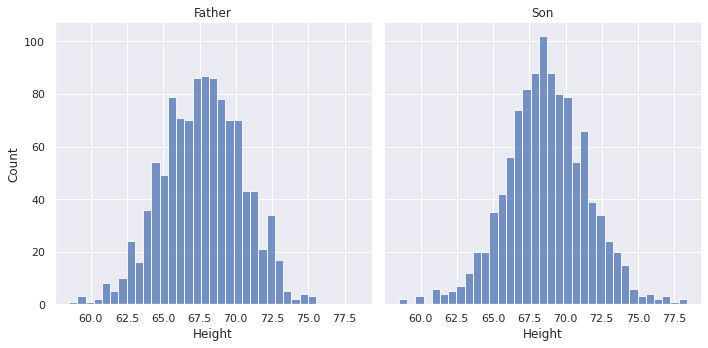

In [4]:
g = sns.displot( data=heights.melt(value_name="Height"), x="Height", col="variable")
g.set_titles(col_template='{col_name}')
plt.savefig("height_histograms.png")

In [5]:
heights.Father.agg(['mean','std'])

mean    67.687097
std      2.744868
Name: Father, dtype: float64

In [6]:
heights.Son.agg(['mean','std'])

mean    68.684070
std      2.814702
Name: Son, dtype: float64

<AxesSubplot:xlabel='Father', ylabel='Son'>

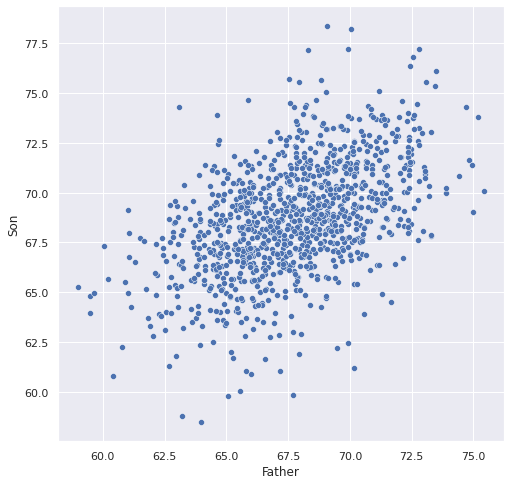

In [7]:
sns.scatterplot(data=heights, x="Father", y="Son")
# plt.savefig("heights.png")

In [8]:
heights['Group'] = heights.Father.round().astype(int)

In [9]:
heights

,Father,Son,Group
0,65.04851,59.77827,65
1,63.25094,63.21404,63
2,64.95532,63.34242,65
3,65.75250,62.79238,66
4,61.13723,64.28113,61
...,...,...,...
1073,66.99681,70.75232,67
1074,71.33181,68.26774,71
1075,71.78314,69.30589,72
1076,70.73837,69.30199,71


In [10]:
son_stats = heights.groupby("Group").agg({"Son":["size","mean","std"]})
son_stats

Son                     
      size       mean       std
Group                          
59       3  64.669410  0.661594
60       4  64.673850  2.776654
61       8  65.930072  2.158895
62      15  65.593267  1.775472
63      36  66.514124  2.909974
64      60  66.701389  2.307661
65     101  67.223182  2.534444
66     139  67.656250  2.350964
67     134  68.139773  2.237706
68     157  69.092820  2.760430
69     142  69.443967  2.299950
70     115  69.768448  2.489530
71      77  70.540819  2.305104
72      50  70.677187  2.329985
73      28  72.049796  2.756266
74       3  70.364610  0.445680
75       6  71.720700  2.053495

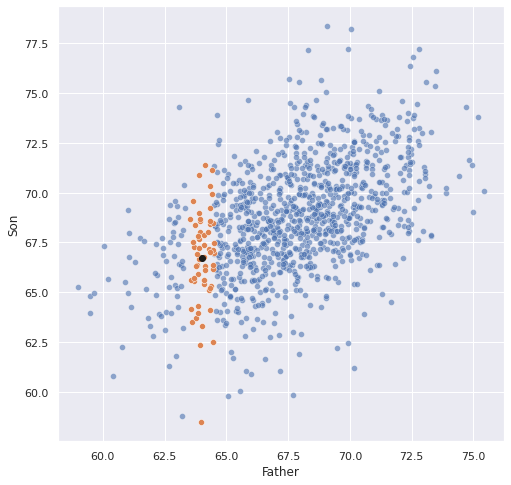

In [11]:
sns.scatterplot( data=heights.query("Group!=64"), x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights.query("Group==64"), x="Father", y="Son" )
plt.plot( son_stats.query("Group==64").Son["mean"], 'ok' )
# plt.savefig("fathers64sons.png")

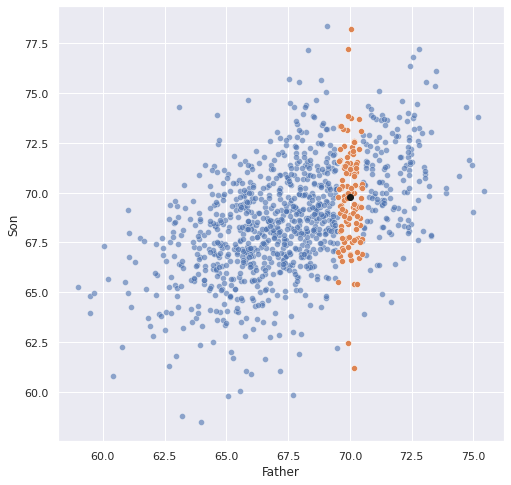

In [12]:
sns.scatterplot( data=heights.query("Group!=70"), x="Father", y="Son", alpha=0.6)
sns.scatterplot( data=heights.query("Group==70"), x="Father", y="Son")
plt.plot( son_stats.query("Group==70").Son["mean"], 'ok' )
# plt.savefig("fathers70sons.png")

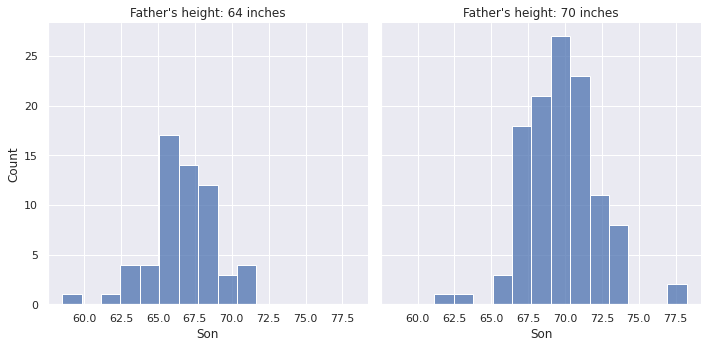

In [13]:
g = sns.displot(data=heights.query("Group==64 or Group==70"),x="Son",col="Group")
g.set_titles(col_template="Father's height: {col_name} inches")
plt.savefig("songroups.png")

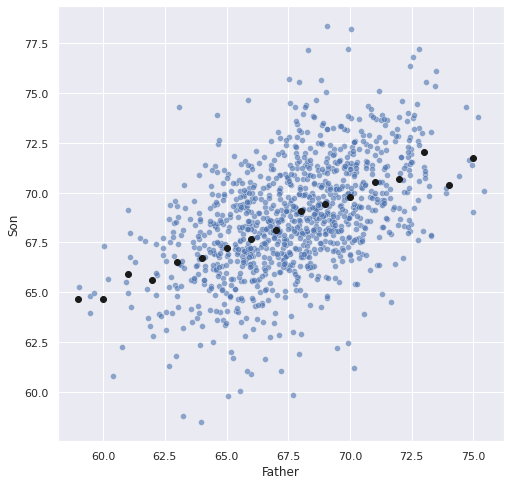

In [14]:
sns.scatterplot(data=heights, x="Father", y="Son",alpha=0.6)
plt.plot(son_stats.Son["mean"], 'ok')

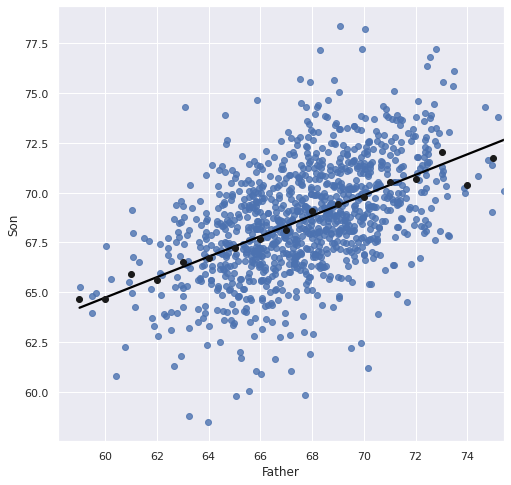

In [15]:
sns.regplot( data=heights, x="Father", y="Son",ci=None,line_kws={"color": "black"})
plt.plot(son_stats.Son["mean"], 'ok')
# plt.savefig("avgsons_with_line.png")

In [16]:
heights_model = smf.ols("Son ~ Father", data=heights)

In [17]:
heights_fit = heights_model.fit()

In [18]:
print( heights_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.12e-69
Time:                        15:17:53   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8866      1.832     18.493      0.0

In [19]:
heights.Father.corr(heights.Son)

0.5013383111723433